In [2]:
# This is query for the Assortative Coefficient template
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [3]:
# Path for all the results
path="/mnt/indexer-build/migrated_data/curated/powerlaw/"
path_casper="/mnt/indexer-build/migrated_data/casper_data/curated/powerlaw/"

In [4]:
def extractorYear(year):
    return(int(str(year)[:4]))

def extractorWeek(year):
    return(int(str(year)[4:]))

In [5]:
all_files = glob.glob(path + "/*/*.csv")
all_files_casper = glob.glob(path_casper + "/*/*.csv")

li = []
li_casper = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

for filename in all_files_casper:
    df_one = pd.read_csv(filename, index_col=None, header=0)
    li_casper.append(df_one)

frame = pd.concat(li, axis=0, ignore_index=True)
frame_casper = pd.concat(li_casper, axis=0, ignore_index=True)

In [6]:
frame_casper["year"]=frame_casper.time_week.apply(extractorYear)
frame_casper["week"]=frame_casper.time_week.apply(extractorWeek)
final2 = frame_casper.sort_values(by=['year','week'])

In [7]:
frame["year"]=frame.time_week.apply(extractorYear)
frame["week"]=frame.time_week.apply(extractorWeek)
final1 = frame.sort_values(by=['year','week'])

In [8]:
extra = final1[((final1.year == 2018) & (final1.week < 26)) | ((final1.year == 2022) & (final1.week > 34))]
extra

,powerlaw_alpha,time_week,year,week
164,1.599114,20181,2018,1
145,2.545612,202252,2022,52


In [9]:
extra2 = final2[((final2.year == 2018) & (final2.week < 26)) | ((final2.year == 2022) & (final2.week > 34))]
extra2

,powerlaw_alpha,time_week,year,week
35,3.468716,202235,2022,35
1,1.597590,202236,2022,36
60,1.597179,202237,2022,37
30,1.907149,202238,2022,38
53,1.621126,202239,2022,39
22,1.550844,202240,2022,40
8,1.513420,202241,2022,41
50,1.644487,202242,2022,42
23,2.534059,202243,2022,43
18,2.120405,202252,2022,52


In [10]:
df = pd.merge(final1, extra, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
df2 = pd.merge(final2, extra2, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [11]:
print("Min Alpha value :"+str(df['powerlaw_alpha'].min()))
print("Max Alpha value :"+str(df['powerlaw_alpha'].max()))
print("1. Quatile Alpha value :"+str(df['powerlaw_alpha'].quantile(.1)))
print("3. Quatile Alpha value :"+str(df['powerlaw_alpha'].quantile(.3)))
print("Median Alpha value :"+str(df['powerlaw_alpha'].median()))

Min Alpha value :1.4223570639487677
Max Alpha value :4.933259278056895
1. Quatile Alpha value :1.7277326363100978
3. Quatile Alpha value :1.9845390056496732
Median Alpha value :2.2201011239074497


In [12]:
print("Min Alpha value :"+str(df2['powerlaw_alpha'].min()))
print("Max Alpha value :"+str(df2['powerlaw_alpha'].max()))
print("1. Quatile Alpha value :"+str(df2['powerlaw_alpha'].quantile(.1)))
print("3. Quatile Alpha value :"+str(df2['powerlaw_alpha'].quantile(.3)))
print("Median Alpha value :"+str(df2['powerlaw_alpha'].median()))

Min Alpha value :1.4884835946566124
Max Alpha value :6.5932319112416575
1. Quatile Alpha value :1.5301700234943583
3. Quatile Alpha value :1.6362214304045568
Median Alpha value :1.731431891644274


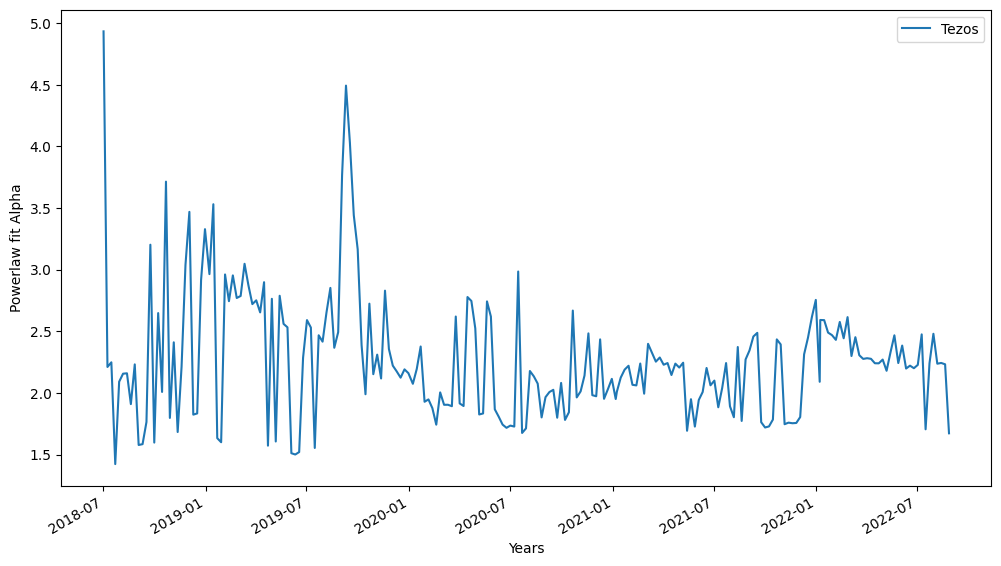

In [13]:
# Determine the date
df['date'] = pd.to_datetime(df.assign(day=1, month=1)[['year', 'month', 'day']])+pd.to_timedelta(df.week*7, unit='days')

# Plot
fig, ax = plt.subplots()
df.plot(x='date', y='powerlaw_alpha', ax=ax, figsize=(12,7))
ax.set_xlabel('Years')
ax.set_ylabel('Powerlaw fit Alpha')
ax.legend(['Tezos'])

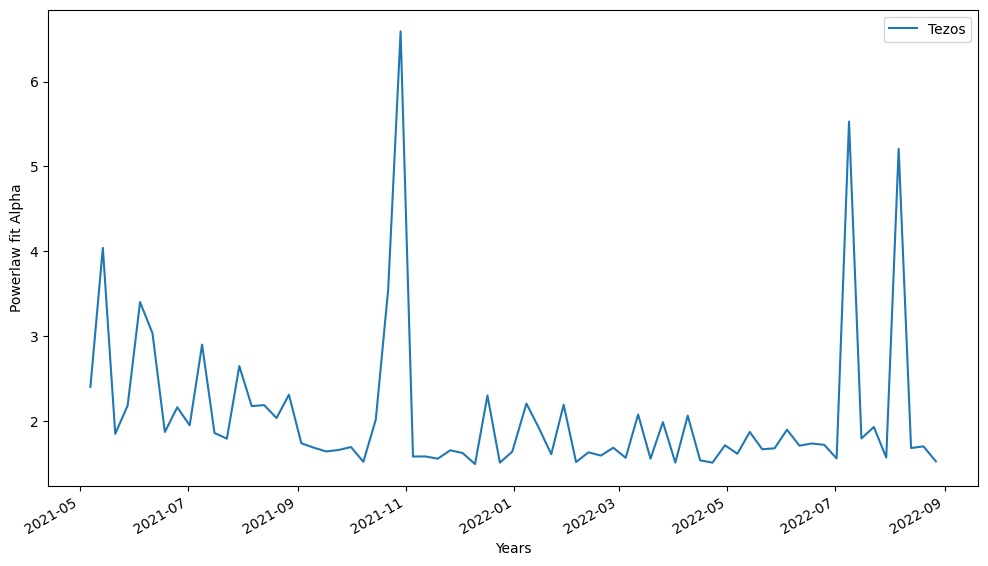

In [14]:
# Determine the date
df2['date'] = pd.to_datetime(df2.assign(day=1, month=1)[['year', 'month', 'day']])+pd.to_timedelta(df2.week*7, unit='days')

# Plot
fig, ax = plt.subplots()
df2.plot(x='date', y='powerlaw_alpha', ax=ax, figsize=(12,7))
ax.set_xlabel('Years')
ax.set_ylabel('Powerlaw fit Alpha')
ax.legend(['Casper'])